# Hash function原理解釋
* 對不同的文字、字串、數字經過特定的函式或演算法，轉換成不同的樣貌，且有兩個特色：
    * 無法反推出原本的訊息
    * 雜湊值會隨輸入的值不同而改變
* 資料庫的應用：
    * 利於檢索和管理
* 密碼學的應用：
    * 對資料進行編碼，進而達到保護資料的效果
        

# Hash Table
* 雜湊函數運算出來的雜湊值，根據鍵(key)儲存在數據結構中，存放這些記錄的數組就稱為就稱為Hash Table
* 也可稱作 HashMap，是 Dictionary 類別中雜湊表的一種實作
* 概念大概是：當要把資料放到雜湊表時，先給定一個 key 和存放的 value，並將 key 的每個字元轉換成 ASCII Code 或 Unicode Code 並相加，這個相加的值即是 hash 鍵值，在 table 陣列上對應到存放的 value
* 而不同的值，有時在雜湊表裡會有相同的對應位置，稱作衝突(collision)，可因應的方法有：
    * 可透過 link list來儲存 value，需要額外的串列鏈結空間，不過為較簡單的方法
    * 修改 hash function 降低重複位置的發生

# 流程圖
## add(self,key)

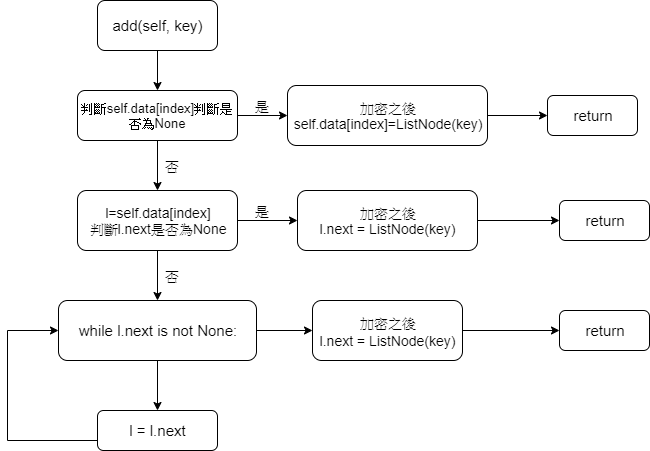

In [8]:
from IPython.display import Image
Image(filename="C:/Users/USER/Desktop/add.png")

# 流程圖
## remove(self,key)

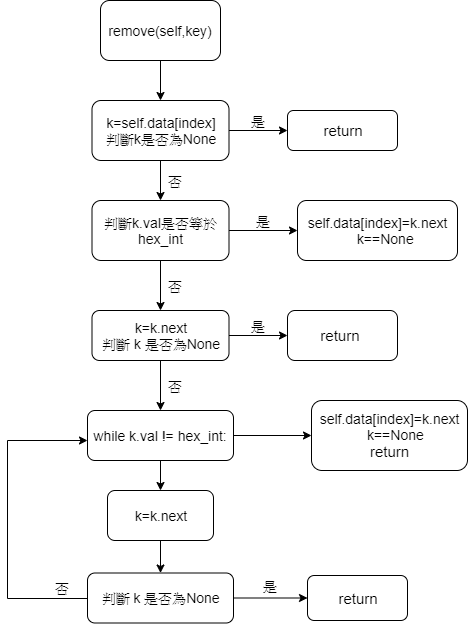

In [9]:
Image(filename="C:/Users/USER/Desktop/remove.png")

# 流程圖
## contains(self,key)

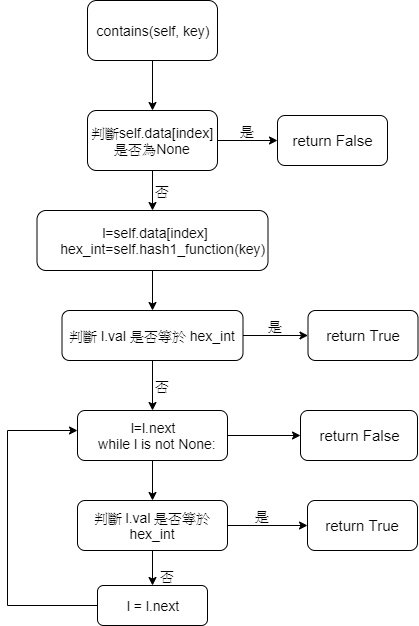

In [10]:
Image(filename="C:/Users/USER/Desktop/contains.png")

# 學習歷程
* 前言：一開始聽老師說這次的作業比前幾次簡單，心理的壓力頓時小很多，因為剛好這週我要出去比賽，怕到時候會無法準時繳交，不過還好，多謝老師手下留情，讓我能沒有顧慮的比賽，好的，那接下來開始講正題
* 首先我一樣是從 add 開始著手，上課聽老師講解一遍後，我想說重複的位置如果要用link list來連結，那應該沒什麼大問題，畢竟剛開學第一個學的就是link list，現在的問題就是該如何在class裡面把key轉換成 MD5？而且老師說add、remove、contains這三個def都需要轉換，所以我先設計一個hash function，讓他來執行轉換的動作，之後在這三個def裡再呼叫他，以下是我的hash_function

In [1]:
 def hash_function(self,key):  #取bucket的位置(餘數)
        from Crypto.Hash import MD5
        new_key=MD5.new()
        new_key.update(key.encode("utf-8"))
        new_hex=new_key.hexdigest()
        new_hex_int=int(str(new_hex),16)
        index=new_hex_int % self.capacity
        return index

之後我想說再建立一個hash1_function來存轉換後的value好了，這樣雖然有點多此一舉，但我還是覺得這樣心理比較踏實

In [3]:
def hash1_function(self,key):  #轉換後的值
        from Crypto.Hash import MD5
        new_key=MD5.new()
        new_key.update(key.encode("utf-8"))
        new_hex=new_key.hexdigest()
        new_hex_int=int(str(new_hex),16)
        return new_hex_int

所以我add一開始是長這樣

In [4]:
 def add(self, key):
        index=MyHashSet().hash_function(key)
        hex_int=MyHashSet().hash1_function(key)

再來首先要考慮的是裡面是否為空值，如果是的話就直接把轉換後的value放進去，如果不是空值就要開始討論是否那個位置已經有value，這就要用到link list的概念來往後放，以下是我的add

In [5]:
def add(self, key):
        index=MyHashSet().hash_function(key)
        hex_int=MyHashSet().hash1_function(key)
        if self.data[index] is None:
            self.data[index]=ListNode(hex_int)
        else:
            l=self.data[index]
            if l.next is None:  
                l.next = ListNode(hex_int)
                return 
            while l.next is not None:
                l=l.next
            l.next=ListNode(hex_int)

寫完之後，還看不出來對錯，所以緊接著我開始寫contains，一開始一樣先呼叫先前創的hash functio，若是bucket裡面沒東西，則直接回傳False，如果裡面有value就開始比對是否跟key是相對應的，如果是一樣的，回傳True，如果不是就繼續往後找，找到最後一個都還是沒找到則回傳False，以下是我的contains

In [6]:
def contains(self, key):
        index=self.hash_function(key)
        if self.data[index] is None:
            return False
        else:
            l=self.data[index]
            hex_int=self.hash1_function(key)
            if l.val==hex_int:
                return True
            else:
                l=l.next
                while l is not None:
                    if l.val==hex_int:
                        return True
                    else:
                        l=l.next
                return False

既然寫好contains了那就可以來測試我的add有沒有寫對

In [9]:
myhashset=MyHashSet()
myhashset.add("people")
myhashset.contains("people")

True

嗯～目前還算成功，但這還只是最單純的情況，但我想說沒事兒，我先繼續寫remove好了，remove的前半段跟前兩個一樣都先呼叫hash function，再來就是許多判別式，因為是collision，所以如果要移除指定的key，就得把它的下一個value往前移，來補它的位置，如果一樣的bucket有其他值，就需用while來往後找，若是找到最後一個還是沒能找到即跳出迴圈，也不用回傳東西，以下是我的remove

In [10]:
def remove(self, key):
        index=self.hash_function(key)
        hex_int=self.hash1_function(key)
        k=self.data[index]
        if k is None:
            return 
        
        if k.val==hex_int:
            k=k.next
            self.data[index]=k
        else:
            k=k.next
            if k is None:
                return 
            while k.val != hex_int:
                k=k.next
                if k.next is None:
                    return 
            self.data[index]=k.next
            return

老規矩，寫完先測試，緊張的時刻來了，到底能不能跑出來呢？

In [11]:
myhashset=MyHashSet()
myhashset.add("people")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True
False


好目前看起來沒有問題，但我發現我的remove只能一次刪除一個，若是要把鄉重複相同的value刪除應該是沒辦法，於是就試看看跟我想的是否一樣

In [14]:
myhashset=MyHashSet()
myhashset.add("people")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.add("people")
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True
True


果然不出我所料，我新增兩個一樣的值，但一次只能刪除一個，於是我想說用while迴圈去執行，若是contains回傳的值為False即終止，所以我稍微修改一下remove，把它改成remove_one，再讓remove執行while迴圈試看看

In [21]:
 def remove(self,key):
        while self.contains(key) is True:
            MyHashSet().remove_one(key)
        return
    
def remove_one(self, key):
    index=self.hash_function(key)
    hex_int=self.hash1_function(key)
    k=self.data[index]
    if k is None:
        return 
        
    if k.val==hex_int:
        k=k.next
        self.data[index]=k
    else:
        k=k.next
        if k is None:
            return 
        while k.val != hex_int:
            k=k.next
            if k.next is None:
                return 
        self.data[index]=k.next
        return

In [22]:
myhashset=MyHashSet()
myhashset.add("people")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.add("people")
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True


KeyboardInterrupt: 

我看了一下出錯在哪裡，但看不懂，於是我就再重頭檢查一下，到底是哪裡出錯，後來發現應該是 `MyHashSet()`那邊出錯，因為class在定義的時候後面沒有括號，我這邊給它括號應該要改成 `self.`，於是就再試一次

In [23]:
def remove(self,key):
        while self.contains(key) is True:
            self.remove_one(key)
        return
    
def remove_one(self, key):
    index=self.hash_function(key)
    hex_int=self.hash1_function(key)
    k=self.data[index]
    if k is None:
        return 
        
    if k.val==hex_int:
        k=k.next
        self.data[index]=k
    else:
        k=k.next
        if k is None:
            return 
        while k.val != hex_int:
            k=k.next
            if k.next is None:
                return 
        self.data[index]=k.next
        return

In [24]:
myhashset=MyHashSet()
myhashset.add("people")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.add("people")
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True


KeyboardInterrupt: 

結果還是不行?! 那我還真的不知道出錯在哪裡了。大概過一天後，我突然想到，它不讓我重複刪除，那我是否可以再add的時候不要把重複的值放入，於是我修改我的add，讓他遇到重複值時，直接return，以下是修改過後的樣子

In [25]:
def add(self, key):
        index=MyHashSet().hash_function(key)
        hex_int=MyHashSet().hash1_function(key)
        if self.data[index] is None:
            self.data[index]=ListNode(hex_int)
        else:
            l=self.data[index]
            if l.next is None:
                if l.val==hex_int:
                    return
                else:    
                    l.next = ListNode(hex_int)
                    return 
            while l.next is not None:
                l=l.next
                if l.val==hex_int:
                    return
            l.next=ListNode(hex_int)

順便再把remove改回來原本的樣子，然後再執行一次測資

In [28]:
myhashset=MyHashSet()
myhashset.add("people")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.add("people")
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True
False


看來好像成功了，那我就再測試看複雜一點的測資好了

In [29]:
myhashset=MyHashSet()
myhashset.add("people")
myhashset.add("teacher")
myhashset.add("student")
myhashset.add("9028")
rel=myhashset.contains("people")
print(rel)
rel=myhashset.add("people")
rel=myhashset.contains("student")
print(rel)
rel=myhashset.remove("people")
rel=myhashset.contains("people")
print(rel)

True
True
False


耐斯喔，看來是沒問題了，對這次作業我覺得比較困難的地方是:
* 該如何放置import
* 刪除重複值
* 轉換思考
以下是我完整的程式碼:

In [30]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
    
    def hash1_function(self,key):  #轉換後的值
        from Crypto.Hash import MD5
        new_key=MD5.new()
        new_key.update(key.encode("utf-8"))
        new_hex=new_key.hexdigest()
        new_hex_int=int(str(new_hex),16)
        return new_hex_int
    
    def hash_function(self,key):  #取bucket的位置(餘數)
        from Crypto.Hash import MD5
        new_key=MD5.new()
        new_key.update(key.encode("utf-8"))
        new_hex=new_key.hexdigest()
        new_hex_int=int(str(new_hex),16)
        index=new_hex_int % self.capacity
        return index
    
    def add(self, key):
        index=MyHashSet().hash_function(key)
        hex_int=MyHashSet().hash1_function(key)
        if self.data[index] is None:
            self.data[index]=ListNode(hex_int)
        else:
            l=self.data[index]
            if l.next is None:
                if l.val==hex_int:
                    return
                else:    
                    l.next = ListNode(hex_int)
                    return 
            while l.next is not None:
                l=l.next
                if l.val==hex_int:
                    return
            l.next=ListNode(hex_int)
    
    def remove(self, key):
        index=self.hash_function(key)
        hex_int=self.hash1_function(key)
        k=self.data[index]
        if k is None:
            return 
        
        if k.val==hex_int:
            k=k.next
            self.data[index]=k
        else:
            k=k.next
            if k is None:
                return 
            while k.val != hex_int:
                k=k.next
                if k.next is None:
                    return 
            self.data[index]=k.next
            return
   
    def contains(self, key):
        index=self.hash_function(key)
        if self.data[index] is None:
            return False
        else:
            l=self.data[index]
            hex_int=self.hash1_function(key)
            if l.val==hex_int:
                return True
            else:
                l=l.next
                while l is not None:
                    if l.val==hex_int:
                        return True
                    else:
                        l=l.next
                return False

## 參考資料
* (https://blog.techbridge.cc/2017/01/21/simple-hash-table-intro/)
* (https://ithelp.ithome.com.tw/articles/10208884)
* (http://www.csie.ntnu.edu.tw/~u91029/Set.html)
* (https://blog.kdchang.cc/2016/09/23/javascript-data-structure-algorithm-dictionary-hash-table/)